# **8.3 Dataframe Operations**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather = pd.read_csv('nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0017,0.0


In [2]:
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


# **Arithmetic and Statistics**

In [3]:
fb.assign(
abs_z_score_volume=lambda x: x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')


,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [4]:
fb.assign(
    volume_pct_change = fb.volume.pct_change(),
    pct_change_rank = lambda x : x.volume_pct_change.abs().rank(
        ascending= False
    )
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [5]:
fb['2018-01-11' : '2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [6]:
(fb > 215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [7]:
(fb > 215).all()

open      False
high      False
low       False
close     False
volume     True
dtype: bool

# **Binning and Thresholds**

In [8]:
(fb.volume.value_counts() > 1).sum() #no two days had the same volume traded


0

In [9]:
"""
pd.cut(cols, bins (how many divisions), and labels )
"""
volume_binned = pd.cut(fb.volume, bins = 3, labels=['low', 'med', 'high'])
volume_binned.value_counts()

volume
low     240
med       8
high      3
Name: count, dtype: int64

In [10]:
fb[volume_binned == 'high'].sort_values(
    'volume', ascending=False
)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [11]:
fb['2018-07-25' : '2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


In [12]:
fb['2018-03-16' : '2018-03-20']

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


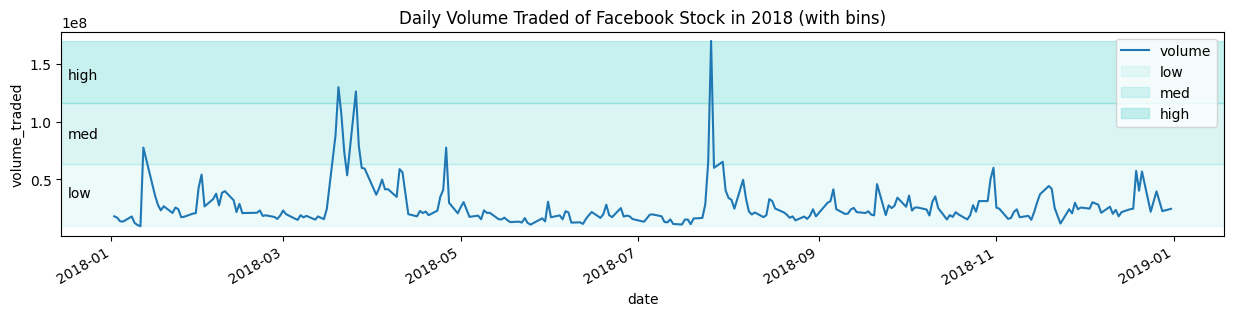

In [13]:
fb.plot(y = 'volume', figsize=(15,3), title='Daily Volume Traded of Facebook Stock in 2018 (with bins)')
for bin_name, alpha, bounds in zip(
    ['low', 'med', 'high'], [0.1, 0.2,0.3], pd.cut(fb.volume, bins = 3).unique().categories.values
):
    plt.axhspan(bounds.left, bounds.right, alpha = alpha, label = bin_name, color = 'mediumturquoise')
    plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))

plt.ylabel('volume_traded')
plt.legend()
plt.show()

In [14]:
#Making bins interms of quartiles using the qcut() function
volume_qbinned = pd.qcut(fb.volume, q = 4, labels = ['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

volume
q1    63
q2    63
q4    63
q3    62
Name: count, dtype: int64

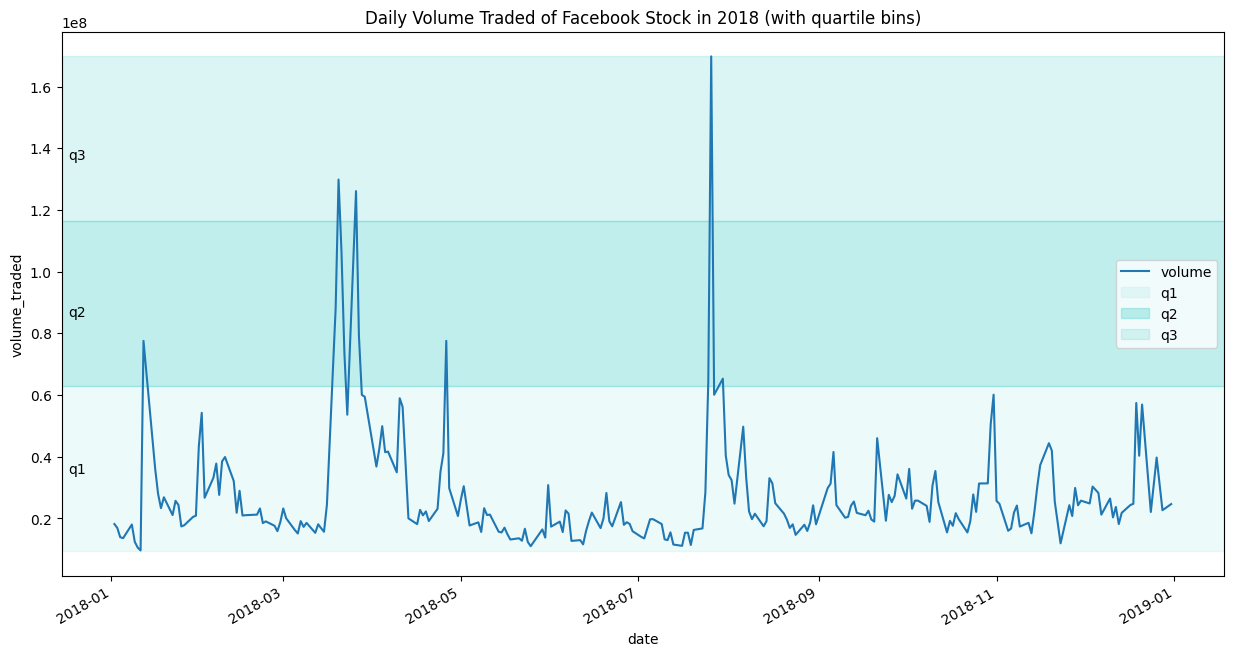

In [15]:
fb.plot(y = 'volume', figsize=(15,8), title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)')
for bin_name, alpha, bounds in zip(
    ['q1', 'q2', 'q3', 'q4'], [0.1, 0.35, 0.2, 0.3], pd.cut(fb.volume, bins = 3).unique().categories.values
):
    plt.axhspan(bounds.left, bounds.right, alpha = alpha, label = bin_name, color = 'mediumturquoise')
    plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))

plt.ylabel('volume_traded')
plt.legend()
plt.show()

In [16]:
#Pivot() examples 
# data = {
#    "value": range(12),
#    "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
#    "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
# }
 

# df = pd.DataFrame(data)
# df

In [17]:
# pivoted = df.pivot(index = 'date', columns= 'variable', values= 'value')
# pivoted

In [18]:
#Using pivot() on Central Station Park
central_park_weather = weather.query('station == "GHCND:USW00094728"').pivot(
    index = 'date',
    columns='datatype',
    values= 'value')
central_park_weather

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.5,0.0,0.0,0.0,-7.1,-13.8,300.0,300.0,6.7,11.2,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.6,0.0,0.0,0.0,-3.2,-10.5,260.0,250.0,7.2,12.5,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.4,0.0,0.0,0.0,-1.0,-8.8,260.0,270.0,6.3,9.8,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.6,19.3,249.0,30.0,-1.6,-7.1,310.0,310.0,10.7,19.2,1.0,1.0,NaN,NaN,1.0
2018-01-05,5.8,0.0,0.0,180.0,-7.1,-12.7,280.0,280.0,9.4,15.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,NaN,0.0,0.0,0.0,6.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,29.2,0.0,0.0,15.6,6.1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2018-12-29,NaN,0.0,0.0,0.0,13.9,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Using clip() to clip the values at a certain threshold (lower, upper)

central_park_weather.SNOW.clip(0, 1).value_counts() #Returns number of SNOW not less than 0 and greater than 1


SNOW
0.0    354
1.0     11
Name: count, dtype: int64

# **Applying Functions**

In [20]:
#Using apply() function to perform a certain operation on specified columns and rows of data frame

oct_weather_z_scores = central_park_weather.loc[
    '2018-10', ['TMIN', 'TMAX', 'PRCP'] 
].apply(lambda x: x.sub(x.mean()).div(x.std()))

oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,4.655774e-17,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


In [21]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.751019,-1.201045,3.936167


In [22]:
#Using Vectorize

fb.apply(
    lambda x: np.vectorize(lambda y : len(str(np.ceil(y))))(x)
).astype('int64').equals(
    fb.applymap(lambda x: len(str(np.ceil(x))))
)

C:\Users\Karl Josef Malaki\AppData\Local\Temp\ipykernel_23640\30448269.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fb.applymap(lambda x: len(str(np.ceil(x))))


True

In [23]:
np.random.seed(0)
import time


vectorized_results = {}
iteritems_results = {}

for size in [10, 100, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000]:
    test = pd.Series(np.random.uniform(size = size))

    start = time.time()
    x = test + 10
    end = time.time()
    vectorized_results[size] = end - start

    start =  time.time()
    x = []
    for i, v in test.iteritems():
        x.append(v + 10)
    x = pd.Series(x)
    end = time.time()
    iteritems_results[size] = end - start

pd.DataFrame(
    [pd.Series(vectorized_results, name = 'vectorized'), pd.Series(iteritems_results, name = 'iteritems')]
).T.plot(title = 'Time Complexity of Vectorized Operations vs. iteritems')

AttributeError: 'Series' object has no attribute 'iteritems'

# Window Calculations



In [27]:
central_park_weather['2018-10'].assign(
    rolling_PRCP = lambda x : x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

KeyError: '2018-10'